## Introduction to Dataset Processing
#### by Carl Shan and Jen Selby

This Jupyter Notebook will share more details about how to process your data. 

Data processing is like preparing the ingredients before cooking; if you prepare them poorly (e.g., leave things half-peeled and dirty) , the meal will taste poor no matter how skillful a chef you are. 

It's similarly true in machine learning. Dataset processing can be one of the most important things you can do to get your model to perform well.

You can read more about dataset processing on the [course notes here](https://jennselby.github.io/MachineLearningCourseNotes/#data-processing).

If you haven't already, follow [the setup instructions here](https://jennselby.github.io/MachineLearningCourseNotes/#setting-up-python3) to get all necessary software installed.

## Table of Contents
  * [Setup](#Setup)
  * [Section 1: Converting Categorical Values to Numerical Ones](#Section-1:-Converting-Categorical-Values-to-Numerical-Ones)
  * [Section 2: Dealing with Text Data](#Section-2:-Dealing-with-Text-Data)
  * [Section 3: Dealing with Null Values](#Section-3:-Dealing-with-Null-Values)
  * [Section 4: Now Let's Learn How to Standardize Data](#Section-4:-Now-Let's-Learn-How-to-Standardize-Data)
  * [Bonus: What if we would like to split up columns?](#Bonus:-What-if-we-would-like-to-split-up-columns?)

### Hint: Use the `?` symbol

As you go through this notebook, as well as learn more about processing data in iPython, it will be helpful to know the `?` symbol.

E.g., You can try to type the following into Python

```python
import sklearn

sklearn?
```

Typing the `?` symbol after a function, module or variable will bring up the documentation of that bit of code, assuming it exists. It'll tell you more about the variable, function or module.


## Setup

In [1]:
import pandas as pd
from sklearn import preprocessing
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

Download the [student performance data](http://archive.ics.uci.edu/ml/machine-learning-databases/00320/) and change the path below to wherever you put the data.

In [7]:
student_data = pd.read_csv('/Users/yoarafa/Documents/MachineLearning/google play store/googleplaystore.csv', sep=',')

In [8]:
student_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


## Section 1: Converting Categorical Values to Numerical Ones

Looking at the data above, we want to convert a number of the columns from categorical to numerical. Most machine learning models deal with numbers and don't know how to model data that is in text form. As a result we need to learn how to do things such as e.g., convert the values in the `school` column to numbers.

### First, let's see what values there are in the `school` column

In [ ]:
# This shows a list of unique values and how many times they appear
student_data['school'].value_counts()

In [ ]:
# Converting values in the school column to text
# We are going to define a function that takes a single value and apply it to all the values
def convert_school(row):
    if row == 'GP':
        return 0
    elif row == 'MS':
        return 1
    else:
        return None

### Avoid for loops
Normally, we might write a for loop like the one below. But this is really slow when using Pandas.

### _Don't write loops like this_.

In [ ]:
# Here's a slow way of using the above function
%time
converted_school = []

for row in student_data['school']:
    new_value = convert_school(row)
    converted_school.append(new_value)
converted_school


# Don't do this! It's very slow.

### Instead, Use `.apply`
This will do the same thing as the for loop above, but _much_ faster. It'll apply a function to all the rows of a `DataFrame`.

In [ ]:
%time
converted_school = student_data['school'].apply(convert_school)
converted_school

Look how much faster that took!

### Or, you can use `.map()`

You can also use the `.map()` function to map certain values to other data.

For example, imagine you had a column named `'colors'` that contained the values `"red"` and `"blue"` and you wanted to convert these to the numbers `1` and `2`.

```python

mappings = {
    'red': 1,
    'blue': 2
}

data['colors_mapped'] = data['colors'].map(mappings)

```

The above will create a new column called `colors_mapped` that now has the values `1` and `2`.

### Using sklearn's built-in preprocessing module, we can do the same thing

In [ ]:
enc_school = preprocessing.LabelEncoder()
transformed_school = enc_school.fit_transform(student_data['school'])
transformed_school

### We can also use one-hot encoding if we have more than two values. We still need to encode it first, as we did above.
See example at https://stackoverflow.com/a/43589167/2159992

In [ ]:
enc_mjob = preprocessing.LabelEncoder()
encoded_mjob = enc_mjob.fit_transform(student_data['Mjob'])
encoded_mjob

In [ ]:
onehot_mjob = preprocessing.OneHotEncoder(sparse=False)
transformed_mjob = onehot_mjob.fit_transform(encoded_mjob.reshape(-1,1))
transformed_mjob

Once we've fitted the label encoder and one-hot encoder, we can use them to transform more values.

In [ ]:
onehot_mjob.transform(enc_mjob.transform(['other', 'health']).reshape(-1,1))

### What if we want to apply a transform that looks at multiple values in the row?
For instance, what if we want to create a new column with a 1 if both parents have the highest level of education measured?

In [ ]:
medu_index = student_data.columns.get_loc('Medu')
fedu_index = student_data.columns.get_loc('Fedu')

def both_parents_edu(row):
    if row[medu_index] > 3 and row[fedu_index] >= 4:
        return 1
    else:
        return 0
    
# axis 1 means that we will apply the function to each row
student_data['parents_high_edu'] = student_data.apply(both_parents_edu, axis=1)
student_data.head(10)

## Section 2: Dealing with Text Data

`pandas` has a lot of built-in modules that work with text-based data. 

`sklearn` similarly has a lot of modules for this as well.

This section gives a brief outline of the things you can try.

If you want to see a fuller list, with examples, of how `pandas` deals with text data, you can look at [the documentation here](https://pandas.pydata.org/pandas-docs/stable/text.html).

In [ ]:
#### First, I'm going to make some fake data that we can work with for the rest of this section

data = pd.DataFrame(data={'text': ['apple', '%badly,formatted,data%', 'pear']})

In [ ]:
data

### Removing or replacing data

Okay, we want to remove the `','` and `'%'` symbols from the data. How do we do so?

In [ ]:
data['text_removed'] = data['text'].str.replace(',', '')

In [ ]:
data

Nice. Now try and replace the `'%'` symbols.

In [ ]:
#### Your code here






### Checking to see if a string contains a certain value

Now, we want to see if a text contains certain values, and only get the rows that contains those values.

In [ ]:
### Again, I have to make some fake data

data = pd.DataFrame(data={'text': ['Nueva Maverick', 'San Francisco Maverick', 'Vikings']})

In [ ]:
data

Cool, what if we only wanted to get the rows that contained the word `'Maverick'`?

In [ ]:
data['text'].str.contains('Maverick')

Now we can use this `Series` of `boolean` `True` and `False` values to index into our data!

In [ ]:
condition = data['text'].str.contains('Maverick')

filtered_data = data[condition]

In [ ]:
filtered_data

### There is a whole list of other things you can do with your text data. 

**Some are listed below:**

* `str.startswith()` and `str.endswith()` - checks to see if a string starts or ends with a given argument
* `str.count()` - counts the number of appearances of a certain pattern
* `str.numeric()` - checks to see if the string is numeric (e.g., `23123` is a digit whereas `213123abc` is not)
* `str.split()` - splits the string on some deliminter and returns a dataframe of the string, split on the characters.

There's plenty more and you can see the [documentation here for more](https://pandas.pydata.org/pandas-docs/stable/text.html).


### What about transforming text data into a DataFrame?

In [ ]:
raw_text = ["""This is a giant series of sentences that you want to convert into a DataFrame containing 
the raw counts for each word. There are some abbr. and some punctuations here and there that make things more complicated.
So how in the world do we turn this into something that we can build a machine learning model off of?
"""]

Okay, so we want to turn the above into a DataFrame where every column is a different word, and each entry stores the number of times that word came up.

We're going to use the `CountVectorizer` class in `sklearn`.

A more [in-depth tutorial on how to use it, and more, can be found here](https://machinelearningmastery.com/prepare-text-data-machine-learning-scikit-learn/).

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
# Initializing an empty CountVectorizer object
count_vect = CountVectorizer()

In [ ]:
# Now we fit the object to our actual data
counts = count_vect.fit_transform(raw_text)

In [ ]:
# This is a `sparse matrix` class. It saves our computer space.
counts

In [ ]:
# Let's use the `.todense()` function to turn this sparse matrix into something that can be transformed into a DataFrame
word_counts_df = pd.DataFrame(data=counts.todense())

In [ ]:
word_counts_df

Great, but what do each of the columns mean?

We can inspect the `count_vect.vocabulary_` attribute to find out.

In [ ]:
count_vect.vocabulary_

Great. Now we know the words for each of the datasets

**Your challenge**: Your challenge is to write some code so that you end converting the columns in `word_counts_df` to each of the words in `count_vect.vocabulary_`.

In [11]:
# If you're successful it should look like the output below.

,abbr,and,are,build,can,complicated,containing,convert,counts,dataframe,...,there,things,this,to,turn,want,we,word,world,you
0,1,2,1,1,1,1,1,1,1,1,...,2,1,2,1,1,1,2,1,1,1


In [ ]:
### Your code here







## Section 3: Dealing with Null Values
To show you how to deal with null values, I'm going to make some simulated data of students.

In [ ]:
import numpy as np
grades = np.random.choice(range(1, 13), 100) # chooses 100 random numbers between 1 - 12
num_friends_or_none = list(range(0, 20)) + [None] * 5
num_friends = np.random.choice(num_friends_or_none, 100)
new_data = pd.DataFrame(data={'Grade': grades, '# Friends': num_friends})

In [ ]:
new_data.head(n=20)

#### One way to deal with null values is to drop them

In [ ]:
new_data['# Friends'].dropna()

#### We can also drop any rows with nulls from the entire table.

In [ ]:
new_data.dropna()

#### Or we can replace the null values with an average

In [ ]:
average_friends = new_data['# Friends'].mean()
new_data['# Friends'].fillna(average_friends)

In [ ]:
new_data['# Friends'] = new_data['# Friends'].fillna(average_friends)

#### What if instead of null values, there is something else that stands for missing values?
Try the replace function.

In [ ]:
grades = np.random.choice(range(1, 13), 100) # chooses 100 random numbers between 1 - 12
num_friends_or_none = list(range(0, 20)) + ["Unknown"] * 5
num_friends = np.random.choice(num_friends_or_none, 100)
unknown_data = pd.DataFrame(data={'Grade': grades, '# Friends': num_friends})
unknown_data

In [ ]:
unknown_data.replace("Unknown", 10)

## Section 4: Now Let's Learn How to Standardize Data
By that I mean to transform our data so that it has a mean of 0 and a standard deviation of 1.

Why would we want to do this?


Well often we will have strange parameter estimates on many models models if different bits of our data are in wildly different ranges.


> Many researchers have noted the importance of standardizing variables for multivariate analysis. 
>
> Otherwise, variables measured at different scales do not contribute equally to the analysis. 

>For example, in boundary detection, a variable that ranges between 0 and 100 will outweigh a variable that ranges between 0 and 1. Using these variables without standardization in effect gives the variable with the larger range a weight of 100 in the analysis. 

>Transforming the data to comparable scales can prevent this problem. Typical data standardization procedures equalize the range and/or data variability.

[Source](https://www.biomedware.com/files/documentation/Preparing_data/Why_standardize_variables.htm)



In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
scaler.fit_transform(new_data)

The above will transform the data so that all the columns have an average of 0 and a standard deviation of 1.

You can read the full documentatio for the `StandardScaler` [here](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).



## Bonus: What if we would like to split up columns?

Maybe  you have data in a column that's a mashup between multiple values.

For example, imagine if you have a column that stores values like:

`'8th Grade - 13 years old'` and `'12th grade - 17 years old'` and you want to create two columns: `grade` and `age` to store the two separate bits of data.

How do you do so?

In [ ]:
# I'm going to generate some fake data here. Ignore the below>
grades = np.random.choice(range(1, 13), 100) # chooses 100 random numbers between 1 - 12
grades_and_ages = ['Grade {grade}  - {age} years old'.format(grade=grade, age=grade+6) for grade in grades]
num_friends_or_none = list(range(0, 20)) + ["Unknown"] * 5
num_friends = np.random.choice(num_friends_or_none, 100)
combined_data = pd.DataFrame(data={'Grade and Age': grades_and_ages, '# Friends': num_friends})

In [ ]:
combined_data

Awesome, now let's split things up. We'll use the built in `.str.split()` function with the extra input `expand=True`.

The `expand=True` will convert the splitted data into a `DataFrame` instead of keeping a list of values. 

(Try taking out `expand=True` and seeing what happens.)

In [ ]:
combined_data['Grade and Age'].str.split(' - ', expand=True)

**Your challenge**: Write some code that does the following:

1. Removes the words 'Grade' and 'years old' from the data
2. Takes these two columns and puts them back into the original `combined_data` DataFrame.

In [ ]:
### Your code here






# Google Play Store Dataset Processing

This dataset comes from Kaggle. It was created by scraping the Google Play Store.

In [2]:
app_data = pd.read_csv('/Users/yoarafa/Documents/MachineLearning/google play store/googleplaystore.csv', sep=',')

In [3]:
app_data.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [4]:
app_data['Category'].value_counts()

FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
LIBRARIES_AND_DEMO       85
AUTO_AND_VEHICLES        85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
COMICS                   60
PARENTING                60
BEAUTY                   53
1.9                       1
Name: Category, dtype: int64

In [5]:
app_data['Size'].value_counts()

Varies with device    1695
11M                    198
12M                    196
14M                    194
13M                    191
                      ... 
160k                     1
210k                     1
642k                     1
317k                     1
714k                     1
Name: Size, Length: 462, dtype: int64

In [6]:
app_data['Installs'].value_counts()

1,000,000+        1579
10,000,000+       1252
100,000+          1169
10,000+           1054
1,000+             907
5,000,000+         752
100+               719
500,000+           539
50,000+            479
5,000+             477
100,000,000+       409
10+                386
500+               330
50,000,000+        289
50+                205
5+                  82
500,000,000+        72
1+                  67
1,000,000,000+      58
0+                  14
Free                 1
0                    1
Name: Installs, dtype: int64

In [7]:
app_data['Content Rating'].value_counts()

Everyone           8714
Teen               1208
Mature 17+          499
Everyone 10+        414
Adults only 18+       3
Unrated               2
Name: Content Rating, dtype: int64

In [8]:
app_data['Genres'].value_counts()

Tools                         842
Entertainment                 623
Education                     549
Medical                       463
Business                      460
                             ... 
Communication;Creativity        1
Lifestyle;Pretend Play          1
Trivia;Education                1
Strategy;Education              1
Health & Fitness;Education      1
Name: Genres, Length: 120, dtype: int64

In [9]:
len(app_data[app_data['Genres']=='NaN'])

0

In [10]:
app_data['Type'].value_counts()

Free    10039
Paid      800
0           1
Name: Type, dtype: int64

You can see that there's a row here that's causing problems. I remove it later on.

In [11]:
app_data['Price'].value_counts()

0          10040
$0.99        148
$2.99        129
$1.99         73
$4.99         72
           ...  
$19.40         1
$4.85          1
$3.61          1
$4.84          1
$109.99        1
Name: Price, Length: 93, dtype: int64

In [12]:
app_data['Android Ver'].value_counts()

4.1 and up            2451
4.0.3 and up          1501
4.0 and up            1375
Varies with device    1362
4.4 and up             980
2.3 and up             652
5.0 and up             601
4.2 and up             394
2.3.3 and up           281
2.2 and up             244
4.3 and up             243
3.0 and up             241
2.1 and up             134
1.6 and up             116
6.0 and up              60
7.0 and up              42
3.2 and up              36
2.0 and up              32
5.1 and up              24
1.5 and up              20
4.4W and up             12
3.1 and up              10
2.0.1 and up             7
8.0 and up               6
7.1 and up               3
5.0 - 8.0                2
1.0 and up               2
4.0.3 - 7.1.1            2
5.0 - 7.1.1              1
7.0 - 7.1.1              1
4.1 - 7.1.1              1
5.0 - 6.0                1
2.2 - 7.1.1              1
Name: Android Ver, dtype: int64

In [13]:
app_data['Current Ver'].value_counts()

Varies with device    1459
1.0                    809
1.1                    264
1.2                    178
2.0                    151
                      ... 
2.6.0.125                1
3.7.17                   1
5.68.1                   1
3.2.0.169                1
1.3.21                   1
Name: Current Ver, Length: 2832, dtype: int64

In [14]:
app_data[app_data['Type']=='0'].head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


## Verifying Columns

In [15]:
app_data[(app_data['Type']=='Free') & (app_data['Price']!='0')].head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [16]:
app_data[(app_data['Type']=='Paid') & (app_data['Price']=='0')].head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [17]:
app_data[app_data.isnull().any(axis=1)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.2,55,2.7M,"5,000+",Free,0,Everyone,Art & Design,"June 6, 2018",NaN,4.2 and up
23,Mcqueen Coloring pages,ART_AND_DESIGN,NaN,61,7.0M,"100,000+",Free,0,Everyone,Art & Design;Action & Adventure,"March 7, 2018",1.0.0,4.1 and up
113,Wrinkles and rejuvenation,BEAUTY,NaN,182,5.7M,"100,000+",Free,0,Everyone 10+,Beauty,"September 20, 2017",8.0,3.0 and up
123,Manicure - nail design,BEAUTY,NaN,119,3.7M,"50,000+",Free,0,Everyone,Beauty,"July 23, 2018",1.3,4.1 and up
126,Skin Care and Natural Beauty,BEAUTY,NaN,654,7.4M,"100,000+",Free,0,Teen,Beauty,"July 17, 2018",1.15,4.1 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10824,Cardio-FR,MEDICAL,NaN,67,82M,"10,000+",Free,0,Everyone,Medical,"July 31, 2018",2.2.2,4.4 and up
10825,Naruto & Boruto FR,SOCIAL,NaN,7,7.7M,100+,Free,0,Teen,Social,"February 2, 2018",1.0,4.0 and up
10831,payermonstationnement.fr,MAPS_AND_NAVIGATION,NaN,38,9.8M,"5,000+",Free,0,Everyone,Maps & Navigation,"June 13, 2018",2.0.148.0,4.0 and up
10835,FR Forms,BUSINESS,NaN,0,9.6M,10+,Free,0,Everyone,Business,"September 29, 2016",1.1.5,4.0 and up


In [18]:
app_data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

Most nulls are in the rating column, but that's because apps without a rating have a null instead

In [19]:
len(app_data[app_data.isnull().any(axis=1)])

1481

## Cleaning Up Bad Rows

In [20]:
app_data = app_data[app_data['Type']!='0']
app_data = app_data[app_data['Type'].notnull()]
app_data = app_data.reset_index(drop=True)

In [21]:
#app_data = app_data.drop(['level_0', 'index'], axis=1)

## Substitute Null Ratings
Here I replace the nulls in the rating column with zeros

In [22]:
app_data['Rating'] = app_data['Rating'].fillna(0.0)

In [23]:
app_data.iloc[23]

App                        Mcqueen Coloring pages
Category                           ART_AND_DESIGN
Rating                                          0
Reviews                                        61
Size                                         7.0M
Installs                                 100,000+
Type                                         Free
Price                                           0
Content Rating                           Everyone
Genres            Art & Design;Action & Adventure
Last Updated                        March 7, 2018
Current Ver                                 1.0.0
Android Ver                            4.1 and up
Name: 23, dtype: object

## Transforming App Name into an Array
This is so that app names can be easily analyzed using Naive Bayes or similar algorithms

In [24]:
app_counts_vect = CountVectorizer()
app_counts = app_counts_vect.fit_transform(app_data['App'])
app_counts.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

## Removing $ from Price
Allows price to be cast as a float

In [25]:
app_data['Price'] = app_data['Price'].str.replace('$','')
app_data['Price'] = pd.to_numeric(app_data['Price'])

In [26]:
app_data.iloc[234]

App               TurboScan: scan documents and receipts in PDF
Category                                               BUSINESS
Rating                                                      4.7
Reviews                                                   11442
Size                                                       6.8M
Installs                                               100,000+
Type                                                       Paid
Price                                                      4.99
Content Rating                                         Everyone
Genres                                                 Business
Last Updated                                     March 25, 2018
Current Ver                                               1.5.2
Android Ver                                          4.0 and up
Name: 234, dtype: object

## Converting Size to Bytes
I'm leaving the 'Varies with device' cells as null so they can be easily removed in the future if an analysis requires

In [27]:
def size_converter(row):
    if row['Size']=='Varies with device':
        return None
    elif row['Size'][-1:]=='M':
        return float(row['Size'][:-1])*1000000
    elif row['Size'][-1:]=='k':
        return float(row['Size'][:-1])*1000
    else:
        return float(row['Size'])

In [28]:
app_data['Converted Size'] = app_data.apply(size_converter, axis=1)

Check it out

In [29]:
app_data.iloc[234]

App               TurboScan: scan documents and receipts in PDF
Category                                               BUSINESS
Rating                                                      4.7
Reviews                                                   11442
Size                                                       6.8M
Installs                                               100,000+
Type                                                       Paid
Price                                                      4.99
Content Rating                                         Everyone
Genres                                                 Business
Last Updated                                     March 25, 2018
Current Ver                                               1.5.2
Android Ver                                          4.0 and up
Converted Size                                          6.8e+06
Name: 234, dtype: object

## Converting Categorical Values

In [30]:
app_data.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
Converted Size    float64
dtype: object

### Type: String -> Float

In [31]:
type_mappings = {
    'Free': '0',
    'Paid': '1'
}

app_data['Paid'] = app_data['Type'].map(type_mappings)
app_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Converted Size,Paid
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,19000000.0,0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,14000000.0,0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,8700000.0,0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,25000000.0,0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,2800000.0,0


### Content Rating: String -> Dummies

Preprocessing method #1: LabelEncoder

In [32]:
enc_rating = preprocessing.LabelEncoder()
encoded_rating = enc_rating.fit_transform(app_data['Content Rating'])
encoded_rating

array([1, 1, 1, ..., 1, 3, 1])

In [33]:
onehot_rating = preprocessing.OneHotEncoder(sparse=False)
transformed_rating = onehot_rating.fit_transform(encoded_rating.reshape(-1,1))
transformed_rating

array([[0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       ...,
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 0.]])

Preprocessing method #2: mapping

In [34]:
rating_mappings = {
    'Everyone': 0,
    'Teen': 1,
    'Everyone 10+': 2,
    'Mature 17+': 3,
    'Adults only 18+': 4,
    'Unrated': 5
}

test_encoding = app_data['Content Rating'].map(rating_mappings)
test_encoding.head()

0    0
1    0
2    0
3    1
4    0
Name: Content Rating, dtype: int64

In [35]:
onehot_rating = preprocessing.OneHotEncoder(sparse=False)
transformed_rating = onehot_rating.fit_transform(test_encoding.to_numpy().reshape(-1,1))
transformed_rating

array([[1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0., 0.]])

In [36]:
test_encoding.tail()

10834    0
10835    0
10836    0
10837    3
10838    0
Name: Content Rating, dtype: int64

In [37]:
rating_dummies = pd.DataFrame(transformed_rating, columns=app_data['Content Rating'].unique()).add_prefix('Rated ')

In [38]:
rating_dummies.tail()

,Rated Everyone,Rated Teen,Rated Everyone 10+,Rated Mature 17+,Rated Adults only 18+,Rated Unrated
10834,1.0,0.0,0.0,0.0,0.0,0.0
10835,1.0,0.0,0.0,0.0,0.0,0.0
10836,1.0,0.0,0.0,0.0,0.0,0.0
10837,0.0,0.0,0.0,1.0,0.0,0.0
10838,1.0,0.0,0.0,0.0,0.0,0.0


In [39]:
joined_app_data = app_data.join(rating_dummies)

### Category: String -> Dummies

In [40]:
enc_category = preprocessing.LabelEncoder()
encoded_category = enc_category.fit_transform(app_data['Category'])
encoded_category

array([ 0,  0,  0, ..., 20,  3, 18])

In [41]:
onehot_category = preprocessing.OneHotEncoder(sparse=False)
transformed_category = onehot_category.fit_transform(encoded_category.reshape(-1,1))
transformed_category

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [42]:
enc_category.transform(app_data['Category'].unique())

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 12, 13, 15, 16, 17, 18,
       14, 11, 20, 27, 26, 24, 28, 30, 29, 23, 25, 22, 32, 31, 21, 19])

This arranges the categories in the right order so they match up with the OneHotEncoder and can be assigned as the column names

In [43]:
category_columns = list(dict(sorted(list(zip(enc_category.transform(app_data['Category'].unique()),app_data['Category'].unique())))).values())

In [44]:
category_dummies = pd.DataFrame(transformed_category, columns=category_columns).add_prefix('Category ')

In [45]:
category_dummies

,Category ART_AND_DESIGN,Category AUTO_AND_VEHICLES,Category BEAUTY,Category BOOKS_AND_REFERENCE,Category BUSINESS,Category COMICS,Category COMMUNICATION,Category DATING,Category EDUCATION,Category ENTERTAINMENT,...,Category PERSONALIZATION,Category PHOTOGRAPHY,Category PRODUCTIVITY,Category SHOPPING,Category SOCIAL,Category SPORTS,Category TOOLS,Category TRAVEL_AND_LOCAL,Category VIDEO_PLAYERS,Category WEATHER
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10835,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10836,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10837,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [46]:
joined_app_data = joined_app_data.join(category_dummies)

In [47]:
joined_app_data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,...,Category PERSONALIZATION,Category PHOTOGRAPHY,Category PRODUCTIVITY,Category SHOPPING,Category SOCIAL,Category SPORTS,Category TOOLS,Category TRAVEL_AND_LOCAL,Category VIDEO_PLAYERS,Category WEATHER
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0.0,Everyone,Art & Design,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0.0,Everyone,Art & Design,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0.0,Teen,Art & Design,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0.0,Everyone,Art & Design;Creativity,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0.0,Everyone,Education,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10835,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0.0,Everyone,Education,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10836,Parkinson Exercices FR,MEDICAL,0.0,3,9.5M,"1,000+",Free,0.0,Everyone,Medical,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10837,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0.0,Mature 17+,Books & Reference,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [48]:
joined_app_data.dtypes

App                              object
Category                         object
Rating                          float64
Reviews                          object
Size                             object
Installs                         object
Type                             object
Price                           float64
Content Rating                   object
Genres                           object
Last Updated                     object
Current Ver                      object
Android Ver                      object
Converted Size                  float64
Paid                             object
Rated Everyone                  float64
Rated Teen                      float64
Rated Everyone 10+              float64
Rated Mature 17+                float64
Rated Adults only 18+           float64
Rated Unrated                   float64
Category ART_AND_DESIGN         float64
Category AUTO_AND_VEHICLES      float64
Category BEAUTY                 float64
Category BOOKS_AND_REFERENCE    float64


In [49]:
joined_app_data.size

585306

In [50]:
joined_app_data.shape

(10839, 54)

## Breaking Up Genres
Apps can have multiple genres separated by semicolons, so you can't just use OneHotEncoder

In [51]:
joined_app_data['Genres'][joined_app_data['Genres'].str.contains(';')].tail(20)

9681      Role Playing;Pretend Play
9682             Puzzle;Brain Games
9683        Educational;Brain Games
9686       Educational;Pretend Play
9687            Racing;Pretend Play
9716      Action;Action & Adventure
9724             Casual;Brain Games
9740            Casual;Pretend Play
9830          Educational;Education
9845              Puzzle;Creativity
9935            Casual;Pretend Play
10097           Education;Education
10217      Communication;Creativity
10389    Entertainment;Pretend Play
10393         Educational;Education
10437       Art & Design;Creativity
10491           Casual;Pretend Play
10500     Racing;Action & Adventure
10504           Casual;Pretend Play
10524           Strategy;Creativity
Name: Genres, dtype: object

In [52]:
unique_genres = []
def get_unique_genres(row):
    for g in row['Genres'].split(';'):
        if g not in unique_genres:
            unique_genres.append(g)

In [53]:
joined_app_data.apply(get_unique_genres, axis=1)
unique_genres

['Art & Design',
 'Pretend Play',
 'Creativity',
 'Action & Adventure',
 'Auto & Vehicles',
 'Beauty',
 'Books & Reference',
 'Business',
 'Comics',
 'Communication',
 'Dating',
 'Education',
 'Music & Video',
 'Brain Games',
 'Entertainment',
 'Events',
 'Finance',
 'Food & Drink',
 'Health & Fitness',
 'House & Home',
 'Libraries & Demo',
 'Lifestyle',
 'Adventure',
 'Arcade',
 'Casual',
 'Card',
 'Action',
 'Strategy',
 'Puzzle',
 'Sports',
 'Music',
 'Word',
 'Racing',
 'Simulation',
 'Board',
 'Trivia',
 'Role Playing',
 'Educational',
 'Music & Audio',
 'Video Players & Editors',
 'Medical',
 'Social',
 'Shopping',
 'Photography',
 'Travel & Local',
 'Tools',
 'Personalization',
 'Productivity',
 'Parenting',
 'Weather',
 'News & Magazines',
 'Maps & Navigation',
 'Casino']

Creating empty columns for each genre

In [54]:
for g in unique_genres:
    joined_app_data['Genre '+g] = 0.0

In [55]:
joined_app_data.dtypes

App                         object
Category                    object
Rating                     float64
Reviews                     object
Size                        object
                            ...   
Genre Parenting            float64
Genre Weather              float64
Genre News & Magazines     float64
Genre Maps & Navigation    float64
Genre Casino               float64
Length: 107, dtype: object

In [56]:
def assign_genres(row):
    for g in row['Genres'].split(';'):
        joined_app_data['Genre '+g][row.name] = 1.0

In [57]:
joined_app_data.apply(assign_genres, axis=1)
joined_app_data['Genre Art & Design'].head()

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: Genre Art & Design, dtype: float64

In [58]:
joined_app_data['Genre Art & Design'].sum()

69.0

In [59]:
joined_app_data[(joined_app_data['Genre Action & Adventure']==1) & (joined_app_data['Genre Adventure']==1)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,...,Genre Photography,Genre Travel & Local,Genre Tools,Genre Personalization,Genre Productivity,Genre Parenting,Genre Weather,Genre News & Magazines,Genre Maps & Navigation,Genre Casino
1653,ROBLOX,GAME,4.5,4447388,67M,"100,000,000+",Free,0.00,Everyone 10+,Adventure;Action & Adventure,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1701,ROBLOX,GAME,4.5,4447346,67M,"100,000,000+",Free,0.00,Everyone 10+,Adventure;Action & Adventure,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1748,ROBLOX,GAME,4.5,4448791,67M,"100,000,000+",Free,0.00,Everyone 10+,Adventure;Action & Adventure,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1841,ROBLOX,GAME,4.5,4449882,67M,"100,000,000+",Free,0.00,Everyone 10+,Adventure;Action & Adventure,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1870,ROBLOX,GAME,4.5,4449910,67M,"100,000,000+",Free,0.00,Everyone 10+,Adventure;Action & Adventure,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016,ROBLOX,FAMILY,4.5,4449910,67M,"100,000,000+",Free,0.00,Everyone 10+,Adventure;Action & Adventure,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2079,Leo and Tig,FAMILY,4.5,47644,27M,"1,000,000+",Free,0.00,Everyone,Adventure;Action & Adventure,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2088,ROBLOX,FAMILY,4.5,4450855,67M,"100,000,000+",Free,0.00,Everyone 10+,Adventure;Action & Adventure,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2121,Transformers Rescue Bots: Hero Adventures,FAMILY,4.2,41273,16M,"5,000,000+",Free,0.00,Everyone,Adventure;Action & Adventure,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2206,ROBLOX,FAMILY,4.5,4450890,67M,"100,000,000+",Free,0.00,Everyone 10+,Adventure;Action & Adventure,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


I noticed there was an Adventure genre and an Action & Adventure genre, so I wanted to check out where they were used together

This led me to find that ROBLOX was duplicated multiple times in the dataset

In [60]:
joined_app_data = joined_app_data.drop_duplicates(subset=['App'], ignore_index=True)

In [61]:
joined_app_data[(joined_app_data['Genre Action & Adventure']==1) & (joined_app_data['Genre Adventure']==1)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,...,Genre Photography,Genre Travel & Local,Genre Tools,Genre Personalization,Genre Productivity,Genre Parenting,Genre Weather,Genre News & Magazines,Genre Maps & Navigation,Genre Casino
1355,ROBLOX,GAME,4.5,4447388,67M,"100,000,000+",Free,0.00,Everyone 10+,Adventure;Action & Adventure,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1626,Leo and Tig,FAMILY,4.5,47644,27M,"1,000,000+",Free,0.00,Everyone,Adventure;Action & Adventure,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1659,Transformers Rescue Bots: Hero Adventures,FAMILY,4.2,41273,16M,"5,000,000+",Free,0.00,Everyone,Adventure;Action & Adventure,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5205,LEGO ® Batman: Beyond Gotham,FAMILY,4.1,10758,8.0M,"100,000+",Paid,4.99,Everyone 10+,Adventure;Action & Adventure,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7175,LEGO Batman: DC Super Heroes,FAMILY,4.2,2557,5.8M,"50,000+",Paid,4.99,Everyone 10+,Adventure;Action & Adventure,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Standardize Reviews

(array([9.614e+03, 3.000e+01, 5.000e+00, 3.000e+00, 0.000e+00, 2.000e+00,
        0.000e+00, 1.000e+00, 2.000e+00, 1.000e+00]),
 array([       0.        ,  7815830.6       , 15631661.2       ,
        23447491.8       , 31263322.4       , 39079153.        ,
        46894983.59999999, 54710814.2       , 62526644.8       ,
        70342475.39999999, 78158306.        ]),
 <BarContainer object of 10 artists>)

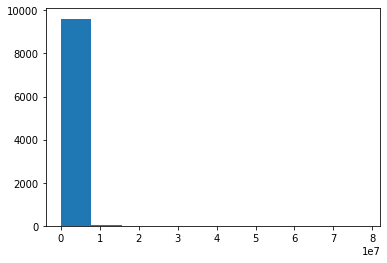

In [62]:
plt.hist(pd.to_numeric(joined_app_data['Reviews']))

You can see that there would be little point to standardizing the review numbers like this because they don't look at all like a normal distribution

I tried to take the log to see if that would make more sense to standardize

(array([1492., 1170., 1241., 1152., 1257., 1462., 1132.,  559.,  174.,
          19.]),
 array([ 0.        ,  1.81742469,  3.63484938,  5.45227407,  7.26969876,
         9.08712345, 10.90454814, 12.72197283, 14.53939752, 16.35682221,
        18.1742469 ]),
 <BarContainer object of 10 artists>)

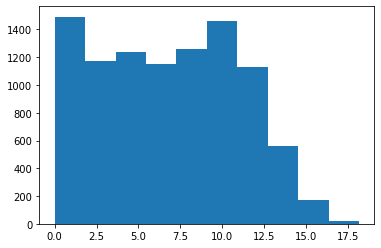

In [63]:
plt.hist(np.log(pd.to_numeric(joined_app_data['Reviews'])+1))

In [90]:
joined_app_data['Reviews'] = pd.to_numeric(joined_app_data['Reviews'])

In [91]:
scaler = preprocessing.StandardScaler()
scaled_reviews = scaler.fit_transform(np.log(joined_app_data['Reviews']+1).to_numpy().reshape(-1, 1))
scaled_reviews

array([[-0.42102045],
       [ 0.00999297],
       [ 1.08851828],
       ...,
       [-1.30430104],
       [-0.50009489],
       [ 1.45138656]])

In [92]:
joined_app_data['Scaled Reviews'] = pd.DataFrame(scaled_reviews)
joined_app_data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,...,Genre Travel & Local,Genre Tools,Genre Personalization,Genre Productivity,Genre Parenting,Genre Weather,Genre News & Magazines,Genre Maps & Navigation,Genre Casino,Scaled Reviews
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19M,"10,000+",Free,0.0,Everyone,Art & Design,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.421020
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14M,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.009993
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7M,"5,000,000+",Free,0.0,Everyone,Art & Design,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.088518
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25M,"50,000,000+",Free,0.0,Teen,Art & Design,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.304466
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8M,"100,000+",Free,0.0,Everyone,Art & Design;Creativity,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.009993
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9653,Sya9a Maroc - FR,FAMILY,4.5,38.0,53M,"5,000+",Free,0.0,Everyone,Education,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.759023
9654,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4.0,3.6M,100+,Free,0.0,Everyone,Education,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.250871
9655,Parkinson Exercices FR,MEDICAL,0.0,3.0,9.5M,"1,000+",Free,0.0,Everyone,Medical,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.304301
9656,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114.0,Varies with device,"1,000+",Free,0.0,Mature 17+,Books & Reference,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.500095


## Final Dataset

In [75]:
joined_app_data.dtypes

App                               object
Category                          object
Rating                           float64
Reviews                          float64
Size                              object
Installs                          object
Type                              object
Price                            float64
Content Rating                    object
Genres                            object
Last Updated                      object
Current Ver                       object
Android Ver                       object
Converted Size                   float64
Paid                              object
Rated Everyone                   float64
Rated Teen                       float64
Rated Everyone 10+               float64
Rated Mature 17+                 float64
Rated Adults only 18+            float64
Rated Unrated                    float64
Category ART_AND_DESIGN          float64
Category AUTO_AND_VEHICLES       float64
Category BEAUTY                  float64
Category BOOKS_A

In [93]:
joined_app_data.size

1043064

In [94]:
joined_app_data.shape

(9658, 108)

I just want to say that although I did a lot of processing, this is nowhere near everything you can do with this dataset. My next goals would be to process Installs and Last Updated.